In [3]:
# Examples from https://seaborn.pydata.org/generated/seaborn.lineplot.html

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(22)
sns.set(color_codes=True)

flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Plot single time series

<Axes: xlabel='year', ylabel='passengers'>

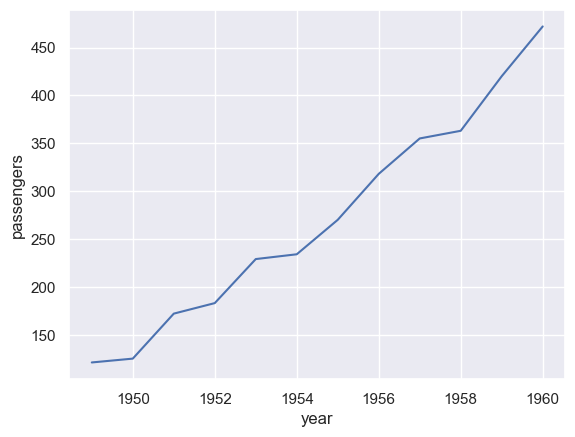

In [6]:
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers")

## Plot multiple time series together

In [7]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


<Axes: xlabel='year'>

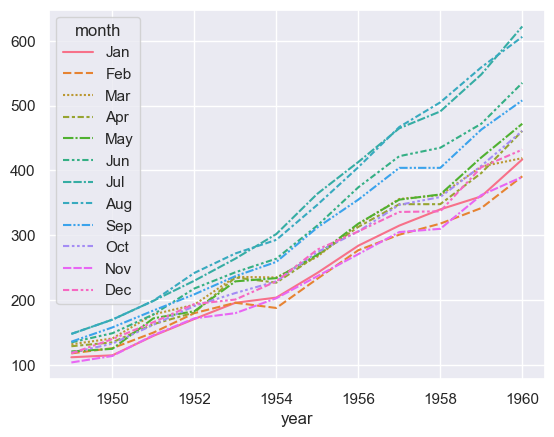

In [8]:
sns.lineplot(data=flights_wide)

## Mean and variance of multiple time series

[1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960]


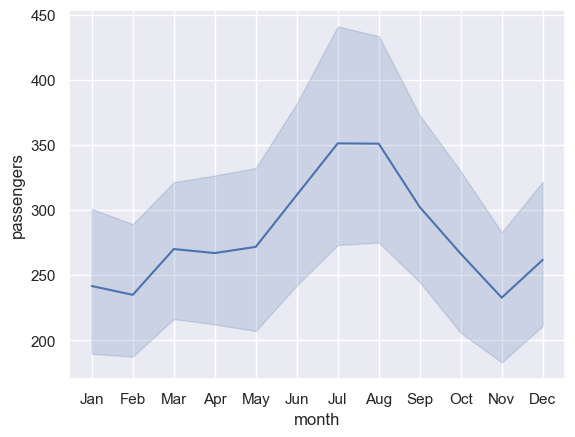

In [13]:
sns.lineplot(data=flights, x="month", y="passengers")
print(flights.year.unique().tolist())

Use median instead of mean for an estimator. Plot min and max error bar instead of the std.

<Axes: xlabel='month', ylabel='passengers'>

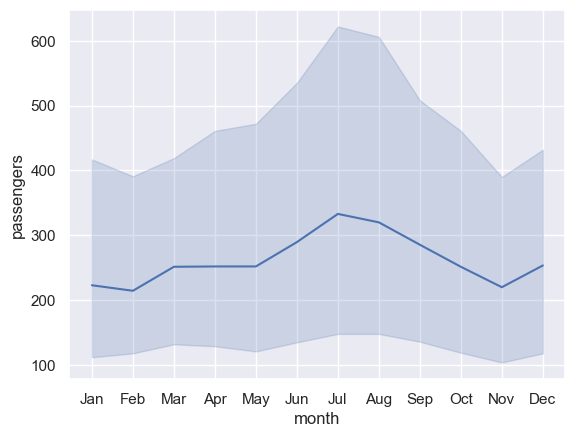

In [43]:
sns.lineplot(data=flights, x="month", y="passengers", estimator=np.median, errorbar=lambda x:(x.min(), x.max()))

Same, but with error bars instead of bands and color is green.

See: https://seaborn.pydata.org/tutorial/error_bars.html

<Axes: xlabel='month', ylabel='passengers'>

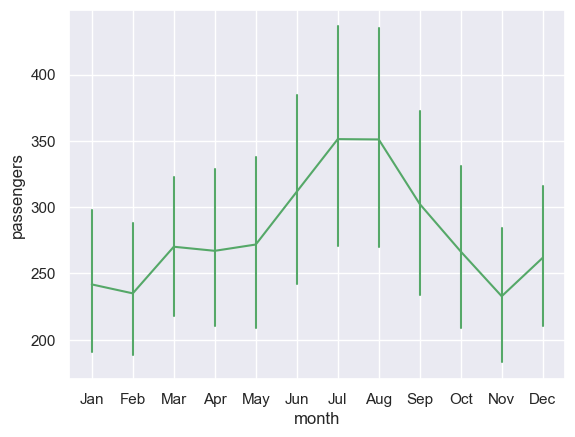

In [50]:
sns.lineplot(data=flights,  x="month", y="passengers", color="g", err_style="bars")

Plot all lines instead of aggregating. Use different colors and line styles depending on data)

<Axes: xlabel='month', ylabel='passengers'>

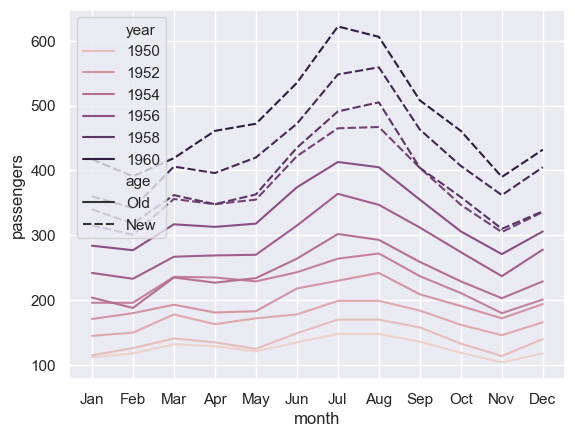

In [75]:
flights["age"] = flights.year.map(lambda x:"New" if x > 1956 else "Old")
sns.lineplot(data=flights, x="month", y="passengers", hue="year", estimator=None, style="age")